<a href="https://colab.research.google.com/github/mayaparvathy/mayaparvathy/blob/main/Nvidia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-4037180701.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(
/tmp/ipython-input-4037180701.py:51: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  first_price = float(df['adj_close'].iloc[0])   # ✅ convert to float
/tmp/ipython-input-4037180701.py:52: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  last_price = float(df['adj_close'].iloc[-1])   # ✅ convert to float


📊 Ticker: NVDA
Data Range: 2015-11-04 → 2025-11-03 (~10.00 years)
Start Price: $0.68
End Price:   $206.88
Historical CAGR: 77.13% per year
Model-Implied Growth Rate: 63.79% per year

🔮 Forecast (Next 5 Years):
            Forecasted Price
2026-11-03            236.18
2027-11-03            386.71
2028-11-03            633.19
2029-11-03           1038.15
2030-11-03           1699.81


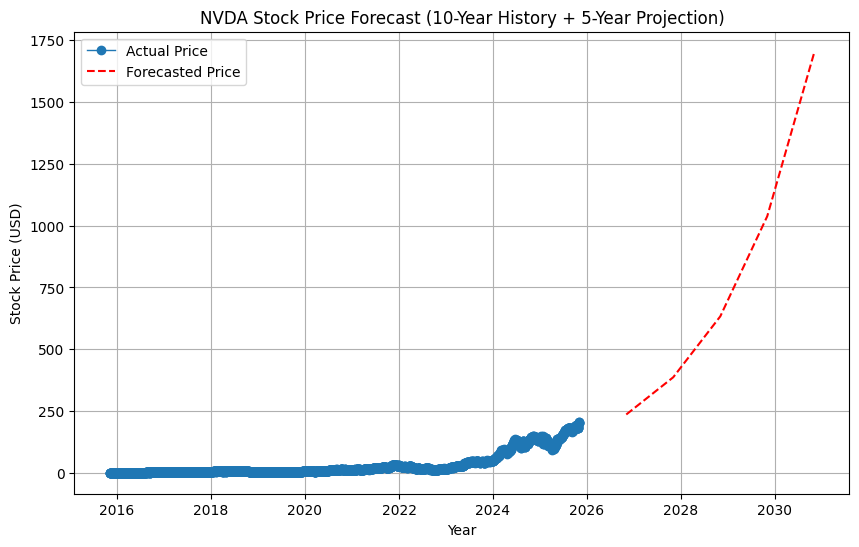


🧾 Notes:
- Uses log-linear regression (exponential trend assumption).
- Does not include fundamentals, macroeconomic events, or valuation factors.
- For educational analysis only — not investment advice.


In [3]:
"""
📈 Stock Growth Projection (10-Year Historical Data + 5-Year Forecast)
-----------------------------------------------------------------------
Features:
- Downloads 10 years of daily stock prices (Yahoo Finance)
- Computes CAGR (Compound Annual Growth Rate)
- Fits a log-linear regression for trend projection
- Forecasts next 5 years of growth
- Plots results cleanly
"""

# 📦 Import libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from datetime import datetime

# ----- PARAMETERS -----
TICKER = "NVDA"          # You can change this to any stock symbol (e.g., "AAPL", "MSFT", "TCS.NS")
YEARS_HISTORY = 10
YEARS_FORECAST = 5
ROLLING = None            # Optional smoothing (e.g., 30 for 30-day average)

# ----- 1️⃣ Download Historical Data -----
end = datetime.today()
start = end - pd.DateOffset(years=YEARS_HISTORY)

df = yf.download(
    TICKER,
    start=start.strftime("%Y-%m-%d"),
    end=end.strftime("%Y-%m-%d"),
    progress=False
)

if df.empty:
    raise SystemExit("❌ No data downloaded. Check ticker or internet connection.")

# ✅ Use 'Close' column (auto-adjusted in new yfinance)
if 'Close' in df.columns:
    df = df[['Close']].rename(columns={'Close': 'adj_close'})
else:
    df.columns = ['adj_close']

# Optional smoothing
if ROLLING:
    df['adj_close'] = df['adj_close'].rolling(ROLLING).mean()

# ----- 2️⃣ Compute CAGR -----
first_price = float(df['adj_close'].iloc[0])   # ✅ convert to float
last_price = float(df['adj_close'].iloc[-1])   # ✅ convert to float
n_years = (df.index[-1] - df.index[0]).days / 365.25
cagr = (last_price / first_price) ** (1 / n_years) - 1

print(f"📊 Ticker: {TICKER}")
print(f"Data Range: {df.index[0].date()} → {df.index[-1].date()} (~{n_years:.2f} years)")
print(f"Start Price: ${first_price:.2f}")
print(f"End Price:   ${last_price:.2f}")
print(f"Historical CAGR: {cagr*100:.2f}% per year")

# ----- 3️⃣ Fit a log-linear regression model -----
days_since_start = (df.index - df.index[0]).days.values.reshape(-1, 1)
log_prices = np.log(df['adj_close'].values).reshape(-1, 1)

model = LinearRegression()
model.fit(days_since_start, log_prices)

slope_per_day = model.coef_[0][0]
annualized_rate = np.exp(slope_per_day * 365.25) - 1
print(f"Model-Implied Growth Rate: {annualized_rate*100:.2f}% per year")

# ----- 4️⃣ Forecast next 5 years -----
last_day = days_since_start[-1, 0]
future_days = np.array([last_day + int(365.25 * i) for i in range(1, YEARS_FORECAST + 1)]).reshape(-1, 1)
future_log_pred = model.predict(future_days)
future_price_pred = np.exp(future_log_pred).flatten()

forecast_dates = [df.index[-1] + pd.DateOffset(years=i) for i in range(1, YEARS_FORECAST + 1)]
forecast_df = pd.DataFrame({'Forecasted Price': future_price_pred}, index=forecast_dates)

print("\n🔮 Forecast (Next 5 Years):")
print(forecast_df.round(2))

# ----- 5️⃣ Plot actual vs forecast -----
plt.figure(figsize=(10,6))
plt.plot(df.index, df['adj_close'], label='Actual Price', marker='o', linewidth=1)
plt.plot(forecast_df.index, forecast_df['Forecasted Price'], 'r--', label='Forecasted Price')
plt.title(f"{TICKER} Stock Price Forecast ({YEARS_HISTORY}-Year History + {YEARS_FORECAST}-Year Projection)")
plt.xlabel("Year")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

# ----- 6️⃣ Notes -----
print("\n🧾 Notes:")
print("- Uses log-linear regression (exponential trend assumption).")
print("- Does not include fundamentals, macroeconomic events, or valuation factors.")
print("- For educational analysis only — not investment advice.")
